Author: Salih Jasim
# Title: Predicting Customer Churn in a Music Subscription Service
## Project for the special topics in machine learning course 

First we will import important libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [145]:
DATA_PATH = r'C:\Users\Saleh\Desktop\kkbox-churn-prediction-challenge'
# DATA_PATH = r'C:\Users\Olabola\Desktop\kkbox-churn-prediction-challenge'

Load all the csv files into memory information about each csv file is shown from the kaggle competition page: https://www.kaggle.com/c/kkbox-churn-prediction-challenge/data

train.csv
the train set, containing the user ids and whether they have churned.

* msno: user id
* is_churn: This is the target variable. Churn is defined as whether the user did not continue the subscription within 30 days of expiration. is_churn = 1 means churn,is_churn = 0 means renewal.

In [146]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train_v2.csv', 'data', 'churn_comp_refresh', 'train_v2.csv'))
train_df.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


members.csv
user information. Note that not every user in the dataset is available.

* msno
* city
* bd: age. Note: this column has outlier values ranging from -7000 to 2015, please use your judgement.
* gender
* registered_via: registration method
* registration_init_time: format %Y%m%d
* expiration_date: format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.

In [147]:
members_df = pd.read_csv(os.path.join(DATA_PATH, 'members_v3.csv', 'members_v3.csv'))
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


transactions.csv
transactions of users up until 3/31/2017.

* msno: user id
* payment_method_id: payment method
* payment_plan_days: length of membership plan in days
* plan_list_price: in New Taiwan Dollar (NTD)
* actual_amount_paid: in New Taiwan Dollar (NTD)
* is_auto_renew
* transaction_date: format %Y%m%d
* membership_expire_date: format %Y%m%d
* is_cancel: whether or not the user canceled the membership in this transaction.

In [148]:
transactions_df = pd.read_csv(os.path.join(DATA_PATH, 'transactions_v2.csv', 'data', 'churn_comp_refresh', 'transactions_v2.csv'))
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


user_logs.csv
daily user logs describing listening behaviors of a user. Data collected until 3/31/2017.

* msno: user id
* date: format %Y%m%d
* num_25: # of songs played less than 25% of the song length
* num_50: # of songs played between 25% to 50% of the song length
* num_75: # of songs played between 50% to 75% of of the song length
* num_985: # of songs played between 75% to 98.5% of the song length
* num_100: # of songs played over 98.5% of the song length
* num_unq: # of unique songs played
* total_secs: total seconds played

In [149]:
user_logs_df = pd.read_csv(os.path.join(DATA_PATH, 'user_logs_v2.csv', 'data', 'churn_comp_refresh', 'user_logs_v2.csv'))
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


### Merging the 'train' and 'members' dataframes
The train dataframe contains the identifiers (msno) for the customer for which we will predict churn as well as whether they churned.

The members dataframe contains user information.

We will merge the dataframes on the 'msno' column.

In [156]:
len(members_df)

6769473

In [150]:
members_train_df = pd.merge(left=train_df, right=members_df, how='left', on='msno')
members_train_df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


In [151]:
members_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


In [152]:
members_train_df.isna().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

## Missing values 
As a result of merging the two dataframes, there are many missing values in the resulting merged dataframe. This is because some of the users in the train dataframe have no information in the members dataframe. 

This occurs in 109,993 rows or 11% of the rows in the merged dataframe. Since this is such a small amount of the data these rows will be removed.

In [157]:
print(f'The merged dataframe contains: {len(members_train_df)} rows')
print(f'There are {members_train_df.city.isna().sum()} users who do not have member information')
print(f'This represents {members_train_df.city.isna().sum() / len(members_train_df) * 100}% of the data')

The merged dataframe contains: 970960 rows
There are 109993 users who do not have member information
This represents 11.328273049353218% of the data


In [158]:
# There are 109,993 instances that have no members information. These rows will be removed.
members_train_df = members_train_df.dropna(subset=['bd'])

In [159]:
members_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860967 entries, 0 to 970958
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    860967 non-null  object 
 1   is_churn                860967 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 52.5+ MB


In [160]:
members_train_df.isna().sum()

msno                           0
is_churn                       0
city                           0
bd                             0
gender                    472062
registered_via                 0
registration_init_time         0
dtype: int64

A problem remains that 472062 users do not have gender information at all. This is a problem with the member data. We will solve this by making assigning them a gender called "unspecified".

In [161]:
members_train_df.fillna('unspecified', inplace=True)

After performing this step we have no more missing values in the merged dataframe

In [162]:
members_train_df.isna().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

### Merging the 'members_train' dataframe with the transactions dataframe
The transactions dataframe contains information on the transactions of users

We will merge the dataframes on the 'msno' column

The problem is that the transactions dataframe contains many different entries for the same user (one for each transaction). So, before we merge the dataframes we must make sure there is only one row per user in the transactions dataframe

In [163]:
# The transactions dataframe does not have unique msno's:
transactions_df.msno.value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
mKhgt4+OvfLtPND/yhKKP6lgC2fK1NDG/N7yTO7/4xU=      1
t2A4dNjCOESJ3Fz2YqaFHFzTVZca6+GGnMhVJXrsxc4=      1
U+gF5gpJSsaCzvxf3ROtEkiWlQ+qb5wWBKO+lm4SyUw=      1
x+9l8q+So4hCuA/crlYYJ5sfb3iz/liphpGtOEe18hQ=      1
Qo4nXoYehQXZeVsN3n65cbXss02Fvat+ohNrWaiVvr0=      1
Name: msno, Length: 1197050, dtype: int64

We will create a dataframe called 'transactions_df_unique_msno' that aggregates information for users across multiple transactions, then we will merge is with members_train_df

In [164]:
transactions_df_unique_msno = pd.DataFrame()

The following operations will aggregate user information into one row per user

In [165]:
# Replace the payment method with the most frequent one:
transactions_df_unique_msno['most_frequent_payment_method_id'] = transactions_df.groupby('msno')['payment_method_id'].agg(lambda x: pd.Series.mode(x)[0])

In [166]:
# Add total payment_plan_days column
transactions_df_unique_msno['total_payment_plan_days'] = transactions_df.groupby('msno')['payment_plan_days'].agg(np.sum)

In [167]:
# Add total plan_list_price column
transactions_df_unique_msno['total_plan_list_price'] = transactions_df.groupby('msno')['plan_list_price'].agg(np.sum)

In [168]:
# Add total actual_amount_paid column
transactions_df_unique_msno['total_actual_amount_paid'] = transactions_df.groupby('msno')['actual_amount_paid'].agg(np.sum)

In [169]:
# Add ratio_cancel column
transactions_df_unique_msno['ratio_cancel'] = transactions_df.groupby('msno')['is_cancel'].agg(np.mean)

In [170]:
# Add a ratio_auto_renew column
transactions_df_unique_msno['ratio_auto_renew'] = transactions_df.groupby('msno')['is_auto_renew'].agg(np.mean)

In [171]:
transactions_df_unique_msno.reset_index(inplace=True)

In [172]:
transactions_df_unique_msno.head()

,msno,most_frequent_payment_method_id,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,ratio_cancel,ratio_auto_renew
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0.0,0.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,0.0,1.0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,60,298,298,0.0,1.0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,0.0,1.0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30,149,149,0.0,1.0


Now we check that the msno's are truly unique

In [ ]:
transactions_df_unique_msno.msno.value_counts()

## Transactions df feature engineering

In [173]:
# Add a feature for the average amount paid per day
transactions_df_unique_msno['avg_amount_paid_per_day'] = transactions_df_unique_msno.total_actual_amount_paid / transactions_df_unique_msno.total_payment_plan_days

In [174]:
# Feature for the difference between the listed price and the price paid by the customer.
transactions_df_unique_msno['diff_plan_list_price_actual_amount_paid'] = transactions_df_unique_msno.total_plan_list_price - transactions_df_unique_msno.total_actual_amount_paid

In [175]:
transactions_df_unique_msno.head()

,msno,most_frequent_payment_method_id,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,ratio_cancel,ratio_auto_renew,avg_amount_paid_per_day,diff_plan_list_price_actual_amount_paid
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0.0,0.0,4.048101,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,0.0,1.0,3.300000,0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,60,298,298,0.0,1.0,4.966667,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,0.0,1.0,4.966667,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30,149,149,0.0,1.0,4.966667,0


Now we will merge 'transactions_df_unique_msno' dataframe with the 'members_train' dataframe

In [176]:
members_train_trans_df = pd.merge(left=members_train_df, right=transactions_df_unique_msno, how='left', on='msno')

There are 35599 users who do not have transaction information. We will remove those users.

In [177]:
members_train_trans_df.isna().sum()

msno                                           0
is_churn                                       0
city                                           0
bd                                             0
gender                                         0
registered_via                                 0
registration_init_time                         0
most_frequent_payment_method_id            35599
total_payment_plan_days                    35599
total_plan_list_price                      35599
total_actual_amount_paid                   35599
ratio_cancel                               35599
ratio_auto_renew                           35599
avg_amount_paid_per_day                    35599
diff_plan_list_price_actual_amount_paid    35599
dtype: int64

In [178]:
members_train_trans_df = members_train_trans_df.dropna(subset=['most_frequent_payment_method_id'])

### Merging the 'members_train_trans_df' dataframe with the user_logs dataframe
The user_logs dataframe contains information on the listening behaviours of users

We will merge the dataframes on the 'msno' column

The problem is that the user_logs dataframe contains many different entries for the same user. So, before we merge the dataframes we must make sure there is only one row per user in the user_logs dataframe

In [179]:
# More than one entry per user:
user_logs_df.msno.value_counts()

brP5eudO1NQ+uIJ890Ped73UNP7O373qnV/epzchAqo=    31
1b0TGj8/iPtzeBTjrREw2m4ICmOACOTjw6lUu1fl4rs=    31
5eHhllrGFOXVpAguczYO7YNVrrvFby4gPDyv1IQM5T4=    31
VqLhAStXpOqrrtMW7j11Y3MaKRTRZ+r2oFtv3x8s7Qk=    31
X0tm/GZSWJbZmsQKzCjohEbmz2HDpkfXYyz1T+iavEY=    31
                                                ..
iqOik1TTZvJgPWdjjgb0FTCgpqKuH87XMlAkPAes1S8=     1
8AdmdVO1kBT8bpHeU9uGuyH4RC3QPUFDbwGwsQ9E7Co=     1
NzyOxCM3cyun/JW4Q5PD1kxX0xMbF9Z3Cx2fX2b64VQ=     1
2l8N8g4M1XShDwr5yWcHWjGOTyfwAhZESpnwH4AA+k8=     1
bVFtG8DOvCnWUOLh5vtr5wuw4UZ8MED9Oq6QJy1k6DM=     1
Name: msno, Length: 1103894, dtype: int64

In [180]:
user_logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   msno        object 
 1   date        int64  
 2   num_25      int64  
 3   num_50      int64  
 4   num_75      int64  
 5   num_985     int64  
 6   num_100     int64  
 7   num_unq     int64  
 8   total_secs  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB


We will create a dataframe to aggregate user_log information across so that each user has one entry

In [181]:
user_logs_unique_msno = pd.DataFrame()

In [182]:
# Create a avg_num_25 column
user_logs_unique_msno['avg_num_25'] = user_logs_df.groupby('msno')['num_25'].agg(np.mean)

In [183]:
# Create a avg_num_50 column
user_logs_unique_msno['avg_num_50'] = user_logs_df.groupby('msno')['num_50'].agg(np.mean)

In [184]:
# Create a avg_num_75 column
user_logs_unique_msno['avg_num_75'] = user_logs_df.groupby('msno')['num_75'].agg(np.mean)

In [185]:
# Create a avg_num_985 column
user_logs_unique_msno['avg_num_985'] = user_logs_df.groupby('msno')['num_985'].agg(np.mean)

In [186]:
# Create a avg_num_100 column
user_logs_unique_msno['avg_num_100'] = user_logs_df.groupby('msno')['num_100'].agg(np.mean)

In [187]:
# Create a avg_num_unq column
user_logs_unique_msno['avg_num_unq'] = user_logs_df.groupby('msno')['num_unq'].agg(np.mean)

In [188]:
# Create a avg_total_secs column
user_logs_unique_msno['avg_total_secs'] = user_logs_df.groupby('msno')['total_secs'].agg(np.mean)

In [189]:
user_logs_unique_msno.reset_index(inplace=True)

In [190]:
user_logs_unique_msno.head()

,msno,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,3.307692,0.423077,0.384615,0.192308,18.153846,20.384615,4534.900962
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,6210.577161
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,4121.830714
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.857143,7.761905,4.761905,3.047619,20.761905,39.428571,7137.931333
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,3.620690,0.827586,1.344828,1.206897,16.517241,7.931034,4014.939552


Now merge 'user_logs_unique_msno' with 'members_train_trans_df' to create the final dataframe

In [191]:
aggregated_df = pd.merge(left=members_train_trans_df, right=user_logs_unique_msno, how='left', on='msno')

Now we will remove the users with no user log information

In [192]:
aggregated_df.isna().sum()

msno                                           0
is_churn                                       0
city                                           0
bd                                             0
gender                                         0
registered_via                                 0
registration_init_time                         0
most_frequent_payment_method_id                0
total_payment_plan_days                        0
total_plan_list_price                          0
total_actual_amount_paid                       0
ratio_cancel                                   0
ratio_auto_renew                               0
avg_amount_paid_per_day                        0
diff_plan_list_price_actual_amount_paid        0
avg_num_25                                 99646
avg_num_50                                 99646
avg_num_75                                 99646
avg_num_985                                99646
avg_num_100                                99646
avg_num_unq         

In [193]:
aggregated_df = aggregated_df.dropna(subset=['avg_num_25'])

Load the aggregated data

In [194]:
aggregated_df = pd.read_csv('aggregated.csv')

# Split data into train and test sets

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(aggregated_df.drop(['msno', 'is_churn'], axis=1), aggregated_df['is_churn'], test_size=0.2, random_state=42)

In [197]:
# Combine X_train and y_train
X_train_y_train = X_train.join(y_train)

# EDA and data cleaning

In [198]:
sns.set(rc = {'figure.figsize':(15,8)})

In [199]:
X_train.head()

,city,bd,gender,registered_via,registration_init_time,most_frequent_payment_method_id,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,ratio_cancel,ratio_auto_renew,avg_amount_paid_per_day,diff_plan_list_price_actual_amount_paid,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_secs
291941,13,25,male,4,20161001,40,30,149,149,0.0,1.0,4.966667,0,1.391304,0.391304,0.782609,0.521739,49.695652,39.695652,12850.113000
615317,1,0,unspecified,7,20150718,41,30,99,99,0.0,1.0,3.300000,0,4.333333,3.666667,0.666667,0.666667,11.000000,18.666667,3307.183000
345189,5,28,male,3,20150213,40,30,149,149,0.0,1.0,4.966667,0,1.916667,0.750000,0.750000,0.583333,12.916667,6.500000,3202.629833
513138,20,28,female,7,20140302,41,30,100,100,0.0,1.0,3.333333,0,1.413793,0.655172,0.241379,0.241379,100.413793,40.241379,22836.479140
83628,15,24,female,3,20150215,39,60,298,298,0.0,1.0,4.966667,0,1.960000,0.000000,0.000000,0.040000,7.920000,9.280000,1951.248480


In [200]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580577 entries, 291941 to 121958
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   city                                     580577 non-null  int64  
 1   bd                                       580577 non-null  int64  
 2   gender                                   580577 non-null  object 
 3   registered_via                           580577 non-null  int64  
 4   registration_init_time                   580577 non-null  int64  
 5   most_frequent_payment_method_id          580577 non-null  int64  
 6   total_payment_plan_days                  580577 non-null  int64  
 7   total_plan_list_price                    580577 non-null  int64  
 8   total_actual_amount_paid                 580577 non-null  int64  
 9   ratio_cancel                             580577 non-null  float64
 10  ratio_auto_renew           

In [201]:
categorical_features = ['city', 'gender', 'registered_via', 'most_frequent_payment_method_id']
numerical_features = ['bd', 'total_payment_plan_days', 'total_plan_list_price', 'total_actual_amount_paid', 'ratio_cancel', 'ratio_auto_renew', 'avg_amount_paid_per_day', 'diff_plan_list_price_actual_amount_paid', 'avg_num_25', 'avg_num_50', 'avg_num_75', 'avg_num_985', 'avg_num_100', 'avg_num_unq', 'avg_total_secs']

We will convert some of the features from floats to integers

In [202]:
X_train = X_train.astype({'city' : int, 'bd' : int, 'registered_via' : int, 'most_frequent_payment_method_id' : int, 'total_payment_plan_days' : int, 'total_plan_list_price' : int, 'total_actual_amount_paid' : int, 'diff_plan_list_price_actual_amount_paid' : int})

The feature we are trying to predict (is_churn) is very imbalanced. We must make sure we take that into account when evaluating metrics. We should not use accuracy alone to judge the performance of our models.

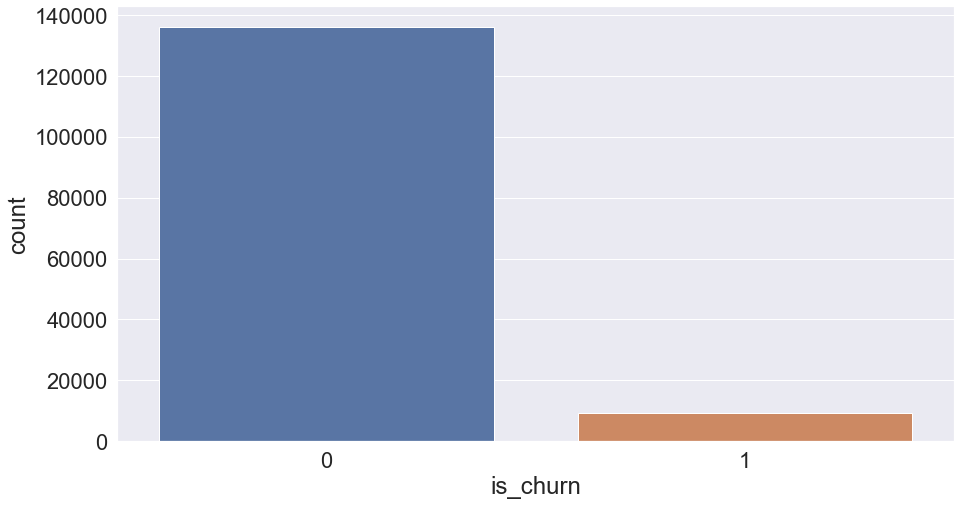

In [206]:
sns.set(font_scale=2)
plot = sns.countplot(data=y_test.to_frame(), x='is_churn')


Let us look at the correlation of the numerical features with the label

It seems that there are many variables that correlate with the label. Moreover, by looking at the heatmap we can see that there may be some redundant features we can remove.

In [207]:
corr_matrix = X_train_y_train[numerical_features + ['is_churn']].corr()
corr_matrix.is_churn.sort_values(ascending=False)

is_churn                                   1.000000
total_payment_plan_days                    0.446258
total_plan_list_price                      0.414054
total_actual_amount_paid                   0.406302
ratio_cancel                               0.362458
bd                                         0.061876
diff_plan_list_price_actual_amount_paid    0.059399
avg_num_unq                                0.026853
avg_num_75                                 0.024861
avg_num_50                                 0.022878
avg_num_25                                 0.019096
avg_total_secs                             0.017914
avg_num_100                                0.016218
avg_num_985                                0.013382
avg_amount_paid_per_day                   -0.008338
ratio_auto_renew                          -0.347427
Name: is_churn, dtype: float64

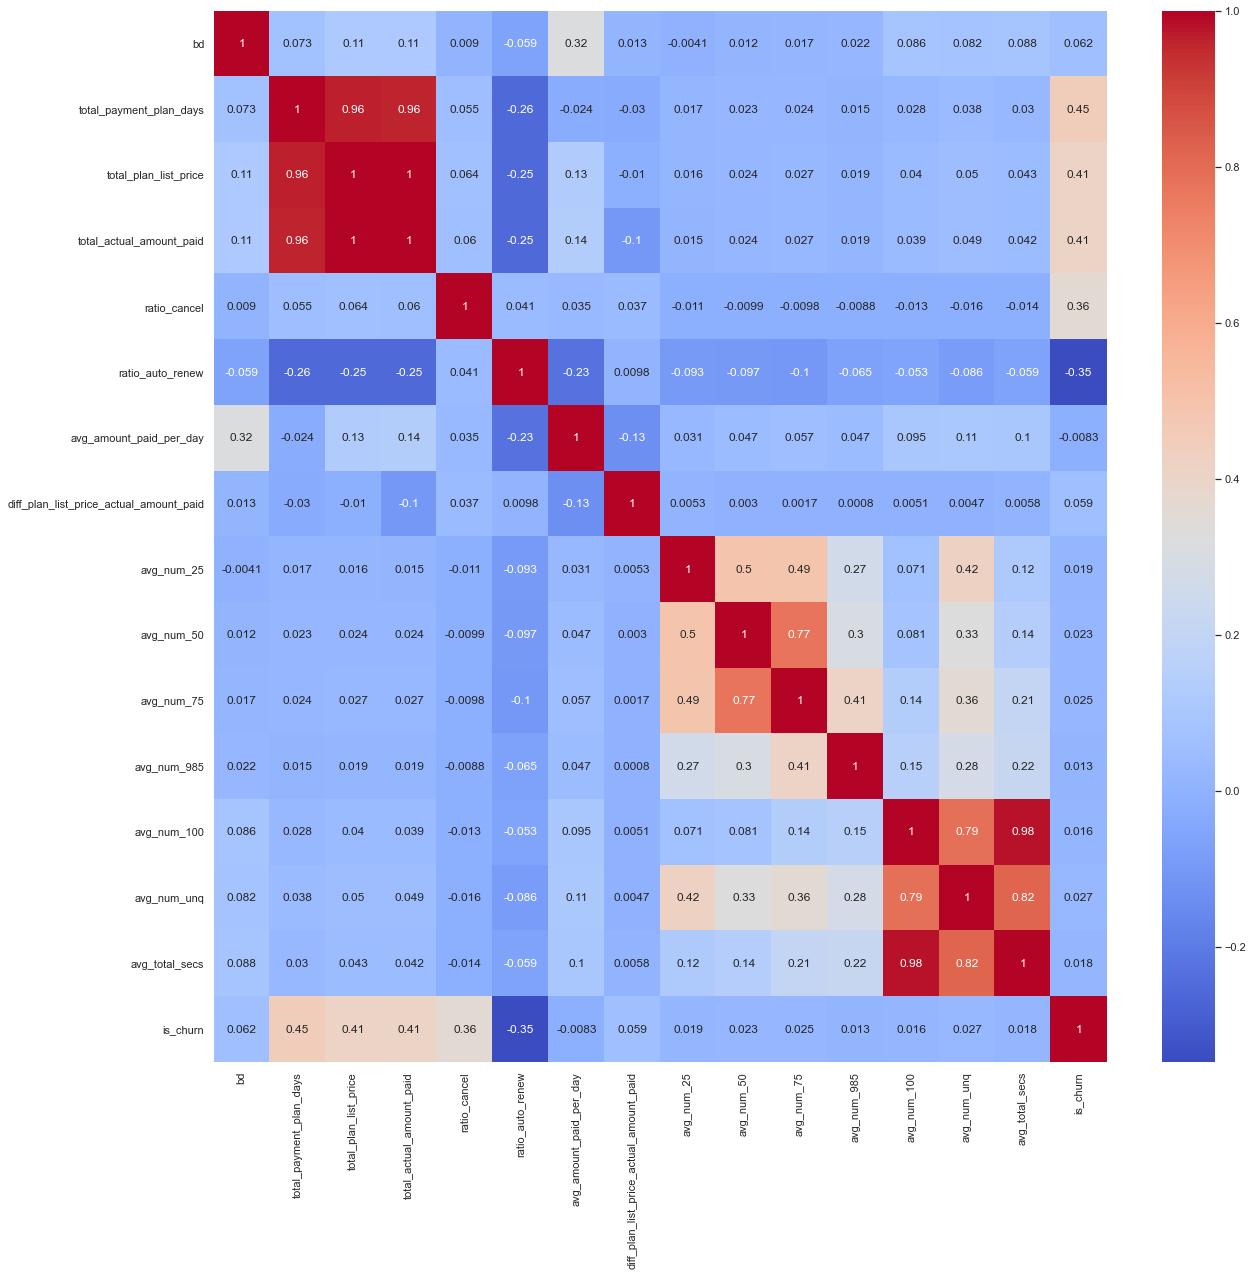

In [217]:
sns.set(font_scale=1)
# increase figure size
sns.set(rc={'figure.figsize':(20,20)})
plt.gcf().subplots_adjust(bottom=0.15)
plot = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
fig = plot.get_figure()
fig.savefig("../figures/corr matrix.png") 

Most of the users are concentrated in the city labeled '1'. There is no information in the dataset that indicates what this city is exactly.

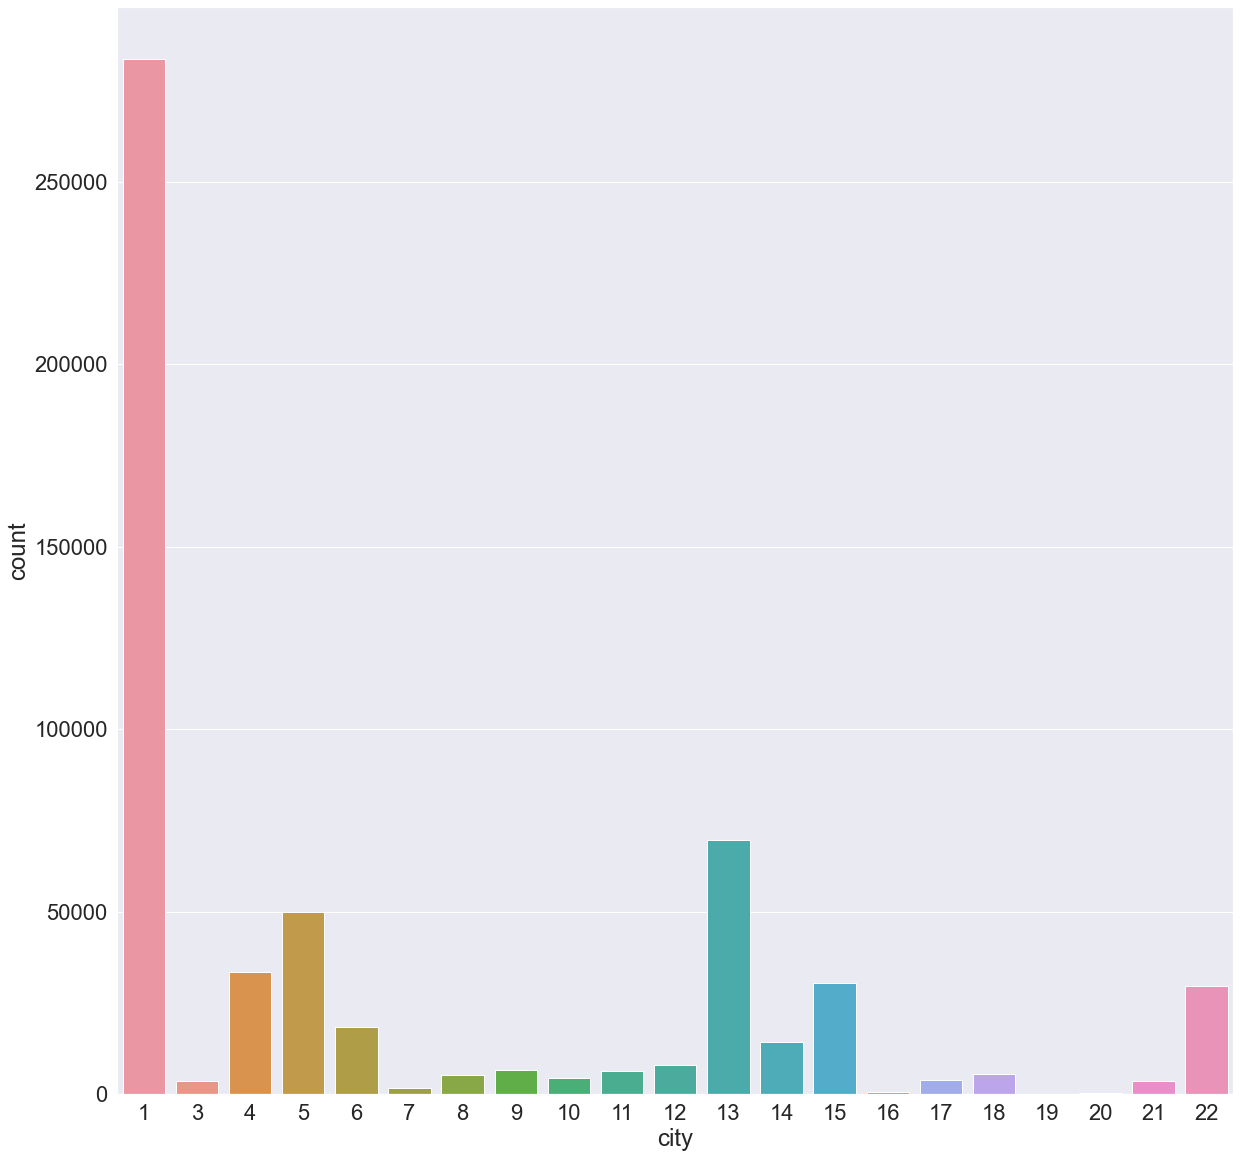

In [220]:
# increase font size
sns.set(font_scale=2)
plot = sns.countplot(data=X_train, x='city')
fig = plot.get_figure()
fig.savefig("../figures/city.png") 

The 'bd' feature represents the age of the user. However, as we can see there are many outliers (bd <= 0 and bs > 100). We will solve this by replacing the age of the outliers with the average age of all users.

In [ ]:
aggregated_df.bd.value_counts()

In [221]:
# Set the bd's who are less than or equal to 0 and who are greater than or equal to 100 to np.nan
X_train.bd[(X_train.bd <= 0) | (X_train.bd >= 100)] = np.nan

<ipython-input-221-8cd8f23d8dc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.bd[(X_train.bd <= 0) | (X_train.bd >= 100)] = np.nan


We can see that most users who user the music streaming servive are quite young as expected.

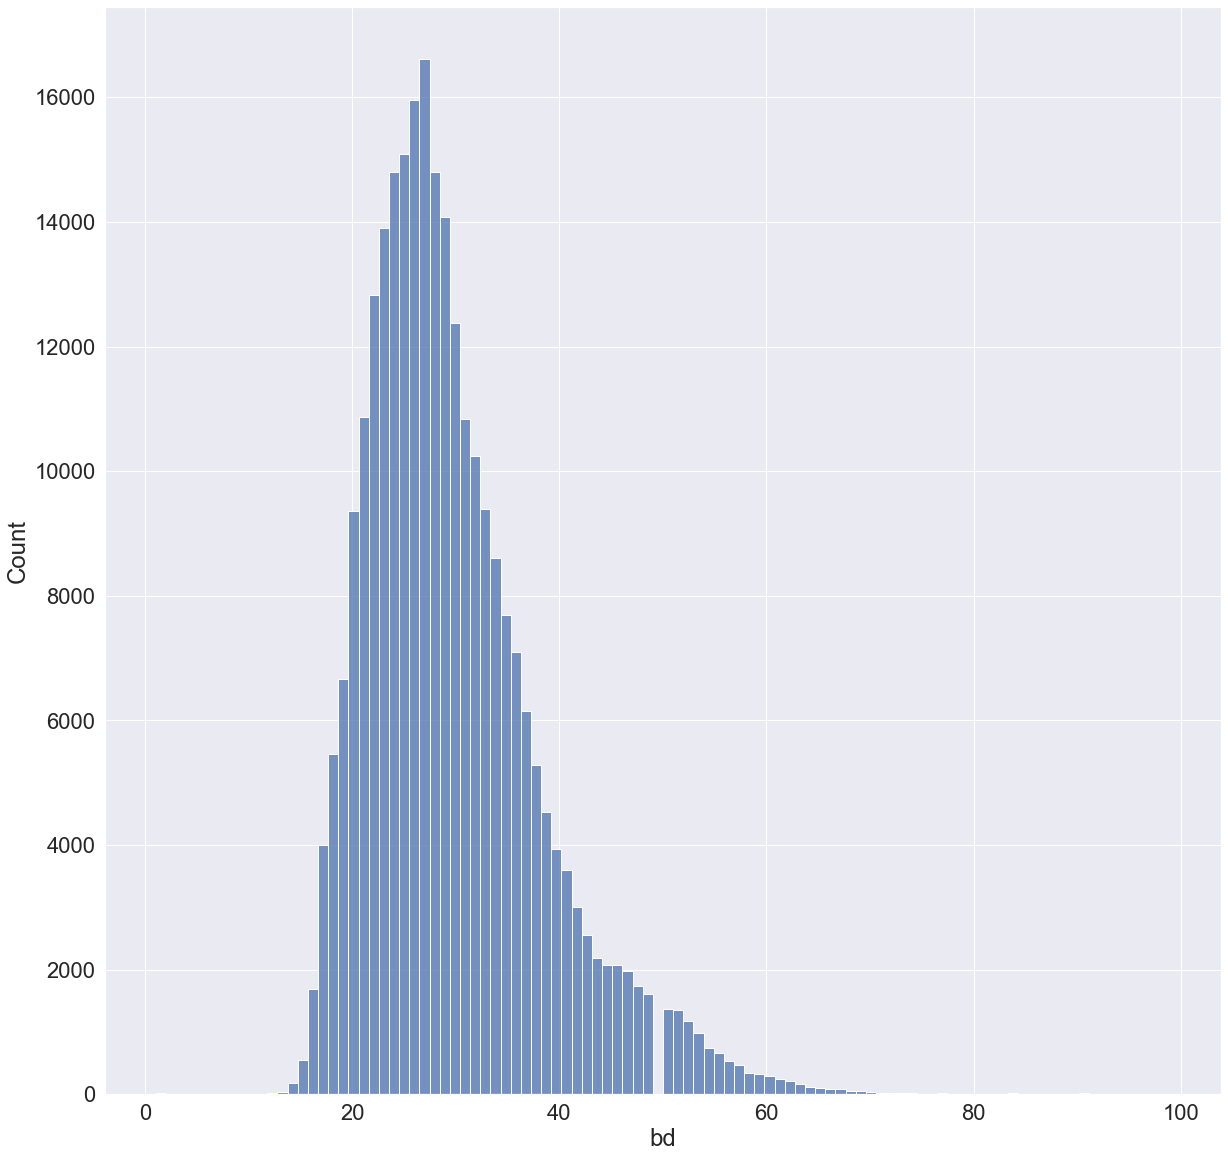

In [223]:
X_bd_int = X_train.bd.dropna()
X_bd_int = X_bd_int.astype(int)
plot = sns.histplot(data=X_bd_int.to_frame(), x='bd', bins=100)


In [224]:
from sklearn.impute import SimpleImputer

We can see that the median age is 28

In [225]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train[['bd']])
imp_median.statistics_

array([28.])

In [226]:
X_bd = imp_median.transform(X_train[['bd']])

In [227]:
X_train.bd = X_bd

In [228]:
X_train = X_train.astype({'bd' : int})

In [229]:
X_train.bd.value_counts()

28    321717
27     16618
26     15954
25     15097
24     14796
       ...  
85         4
80         4
9          4
8          3
99         1
Name: bd, Length: 99, dtype: int64

Most users have not entered their gender information.

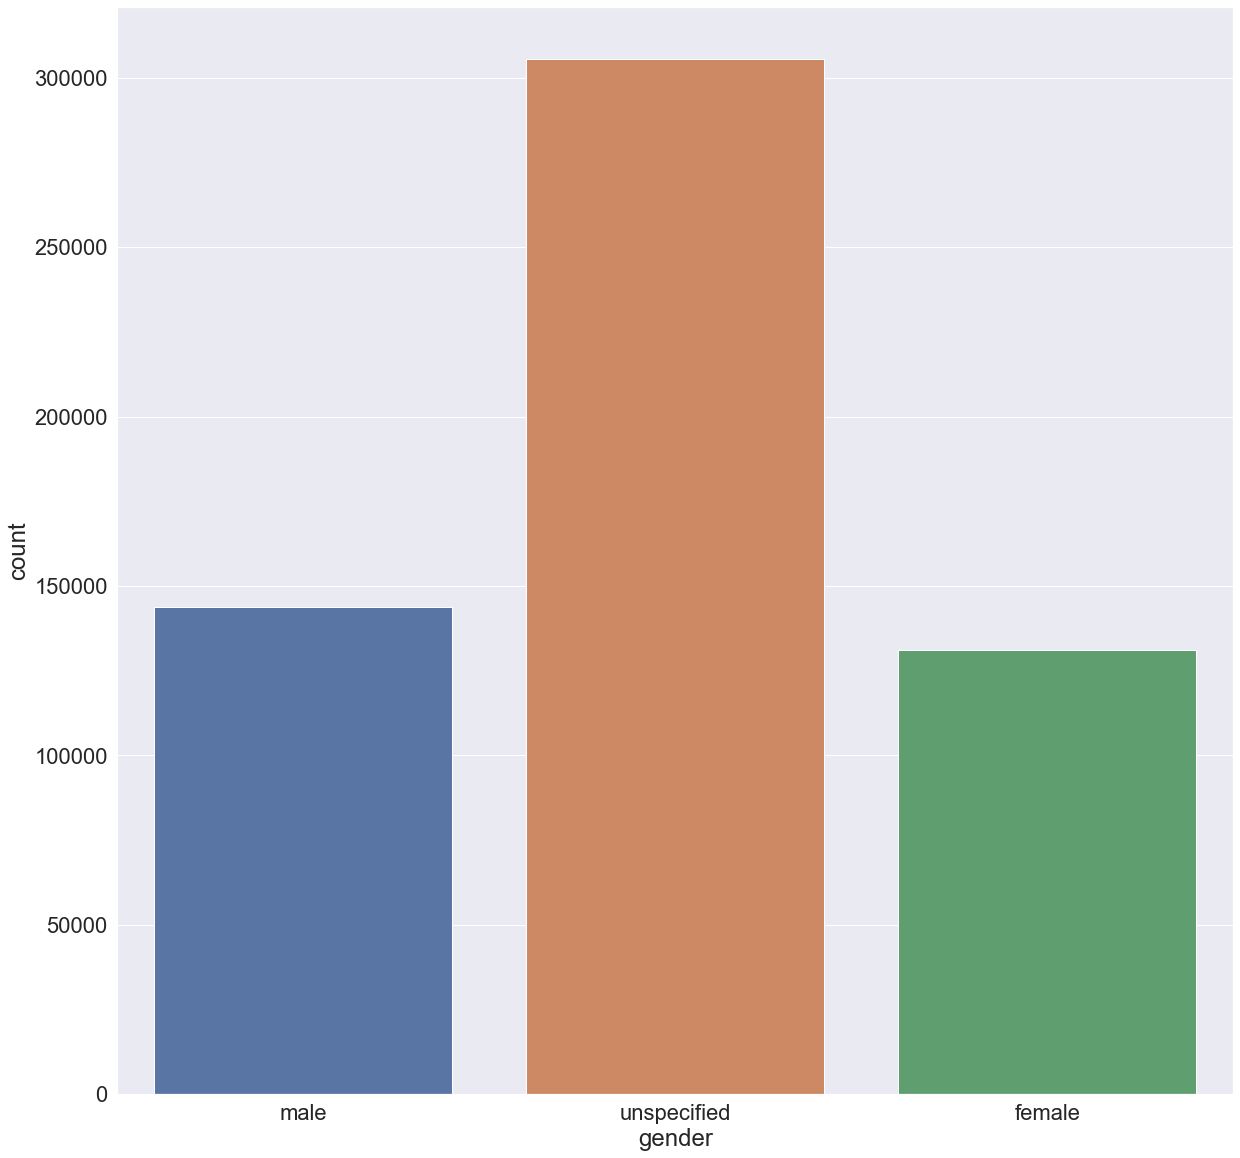

In [231]:
plot = sns.countplot(data=X_train, x='gender')


In [238]:
sns.violinplot(data=X_train, x='avg_total_secs', y='bd')

KeyboardInterrupt: 

In [244]:
X_gender_no_unspecified = pd.merge(X_train[X_train.gender != 'unspecified'], aggregated_df.is_churn, left_index=True, right_index=True)

Most users who do specify their gender are male

C:\Users\Saleh\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

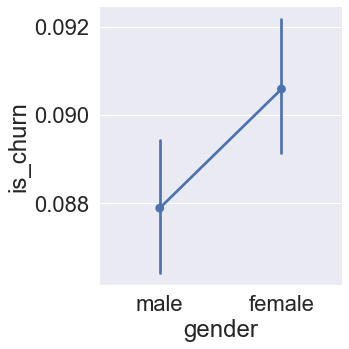

In [254]:
# increase figure size
sns.set(font_scale = 2)
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plot = sns.factorplot(data=X_gender_no_unspecified, x='gender', y='is_churn')

plt.savefig('../figures/gender churn.png')

Most of the churned users are also male

<ipython-input-250-e2c053c1a984>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=X_train_y_train[X_train_y_train.gender != 'unspecified'][X_train_y_train.is_churn == 1], x='gender')


<AxesSubplot:xlabel='gender', ylabel='count'>

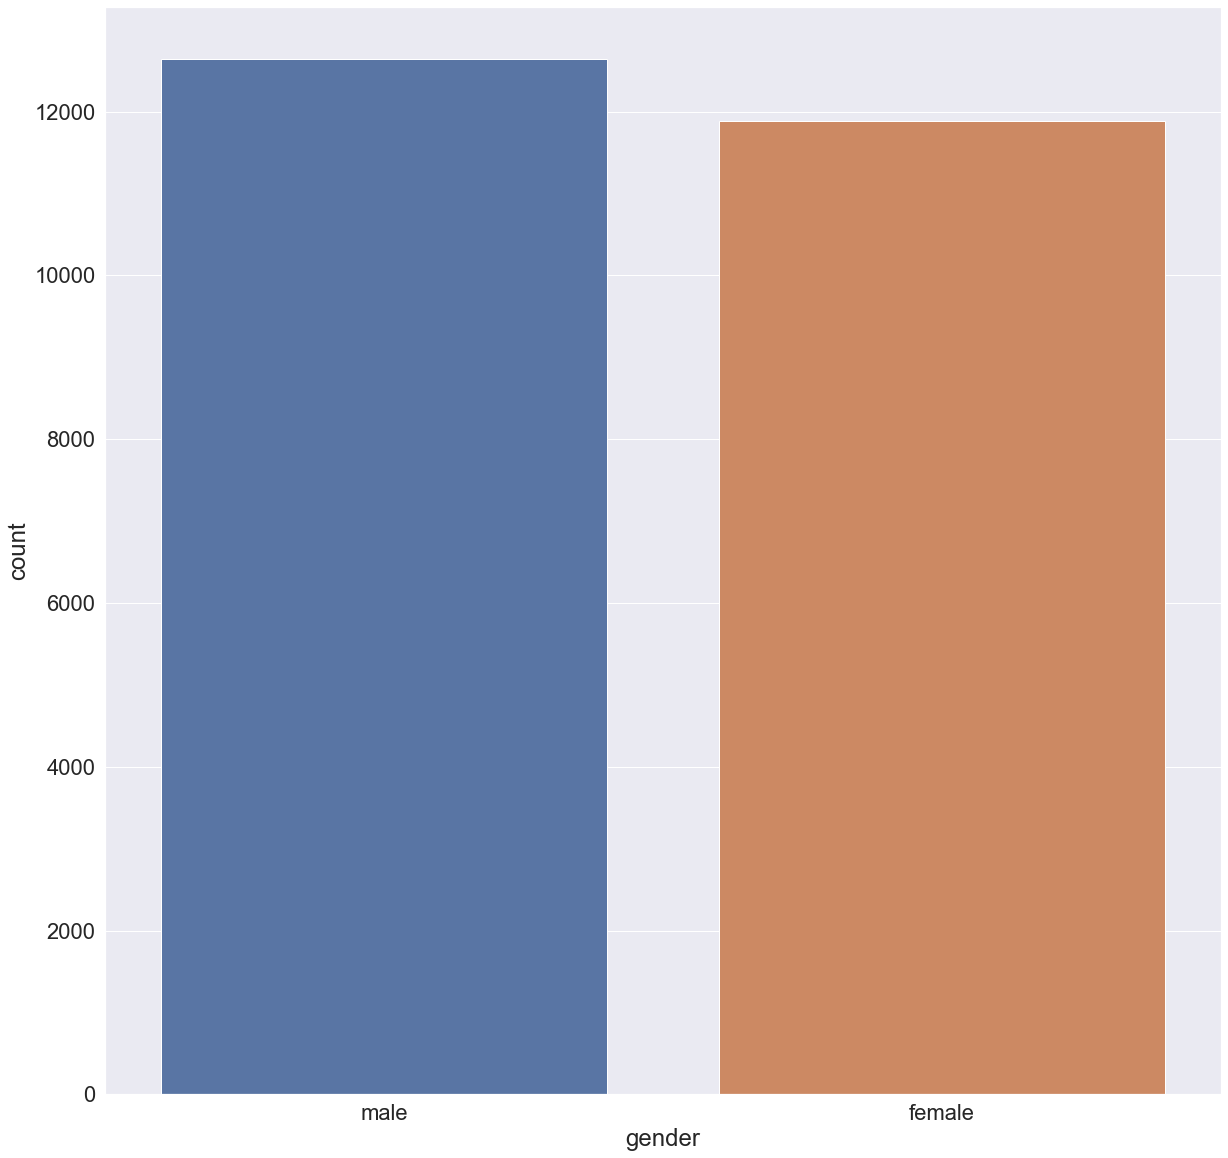

In [250]:
sns.countplot(data=X_train_y_train[X_train_y_train.gender != 'unspecified'][X_train_y_train.is_churn == 1], x='gender')

How did the users register?

In [ ]:
sns.countplot(data=X_train_y_train, y='registered_via')

Among the churned users registration method 7 is very underrepresentated. While 9 is very popular.

In [ ]:
sns.countplot(data=X_train_y_train[X_train_y_train.is_churn == 1], y='registered_via')

Most users use payment method id 41. However users seem to churn across all payment method ids.

In [ ]:
sns.countplot(data=X_train_y_train, x='most_frequent_payment_method_id')

In [ ]:
sns.countplot(data=X_train_y_train[X_train_y_train.is_churn == 1], x='most_frequent_payment_method_id')

Now we will look at the most correlated numerical features

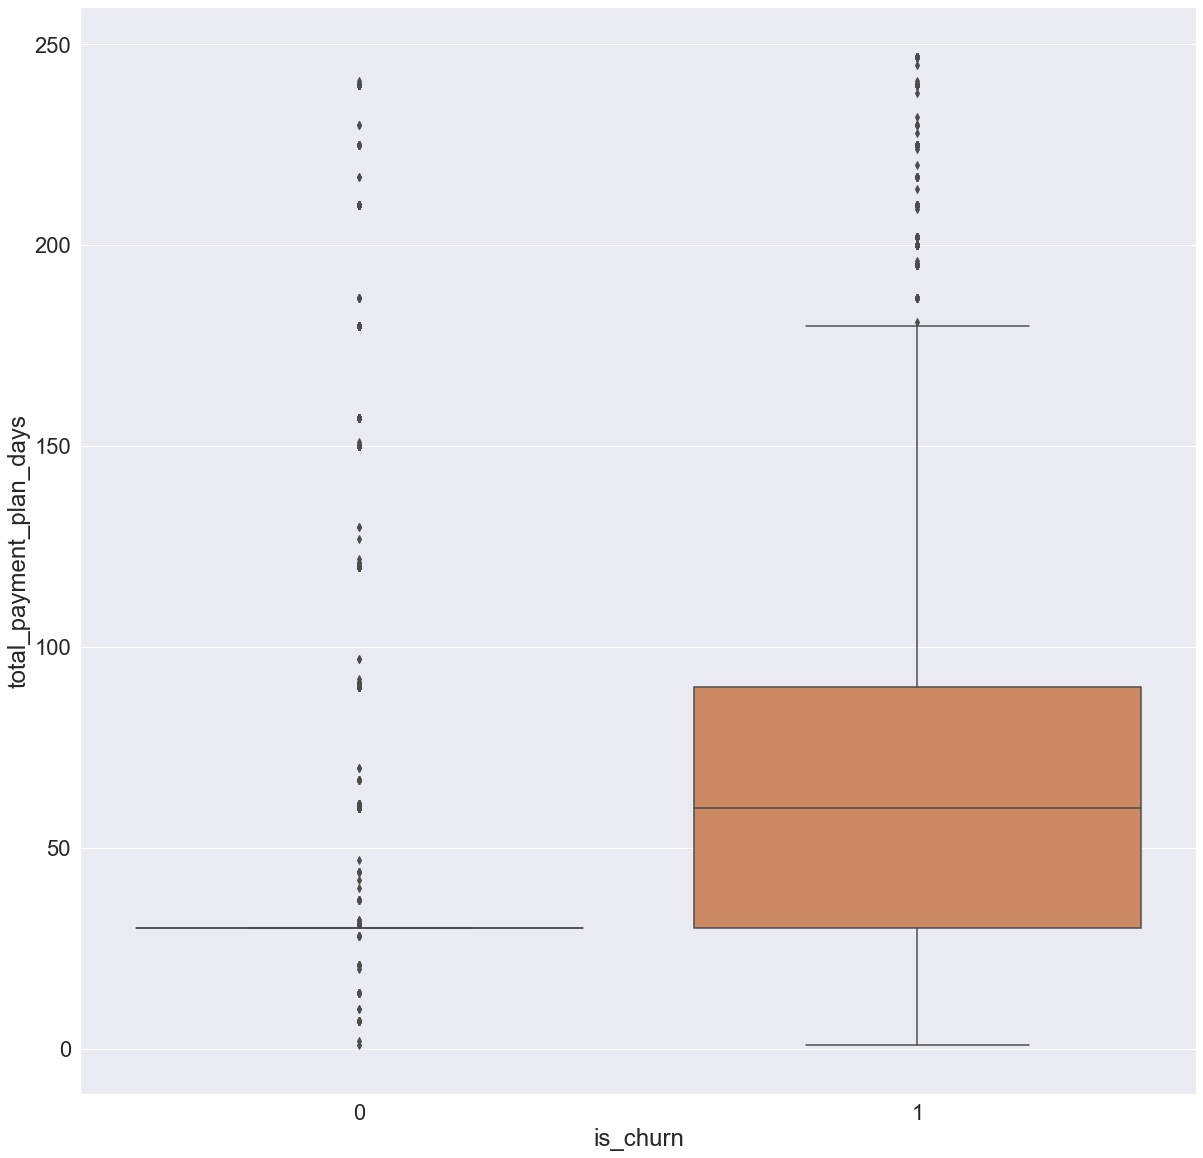

In [261]:
sns.boxplot(x='is_churn', y='total_payment_plan_days', data=X_train_y_train[X_train_y_train.total_payment_plan_days < 250])
plt.savefig('../figures/total_payment_plan_days.png')

<AxesSubplot:xlabel='total_plan_list_price', ylabel='Density'>

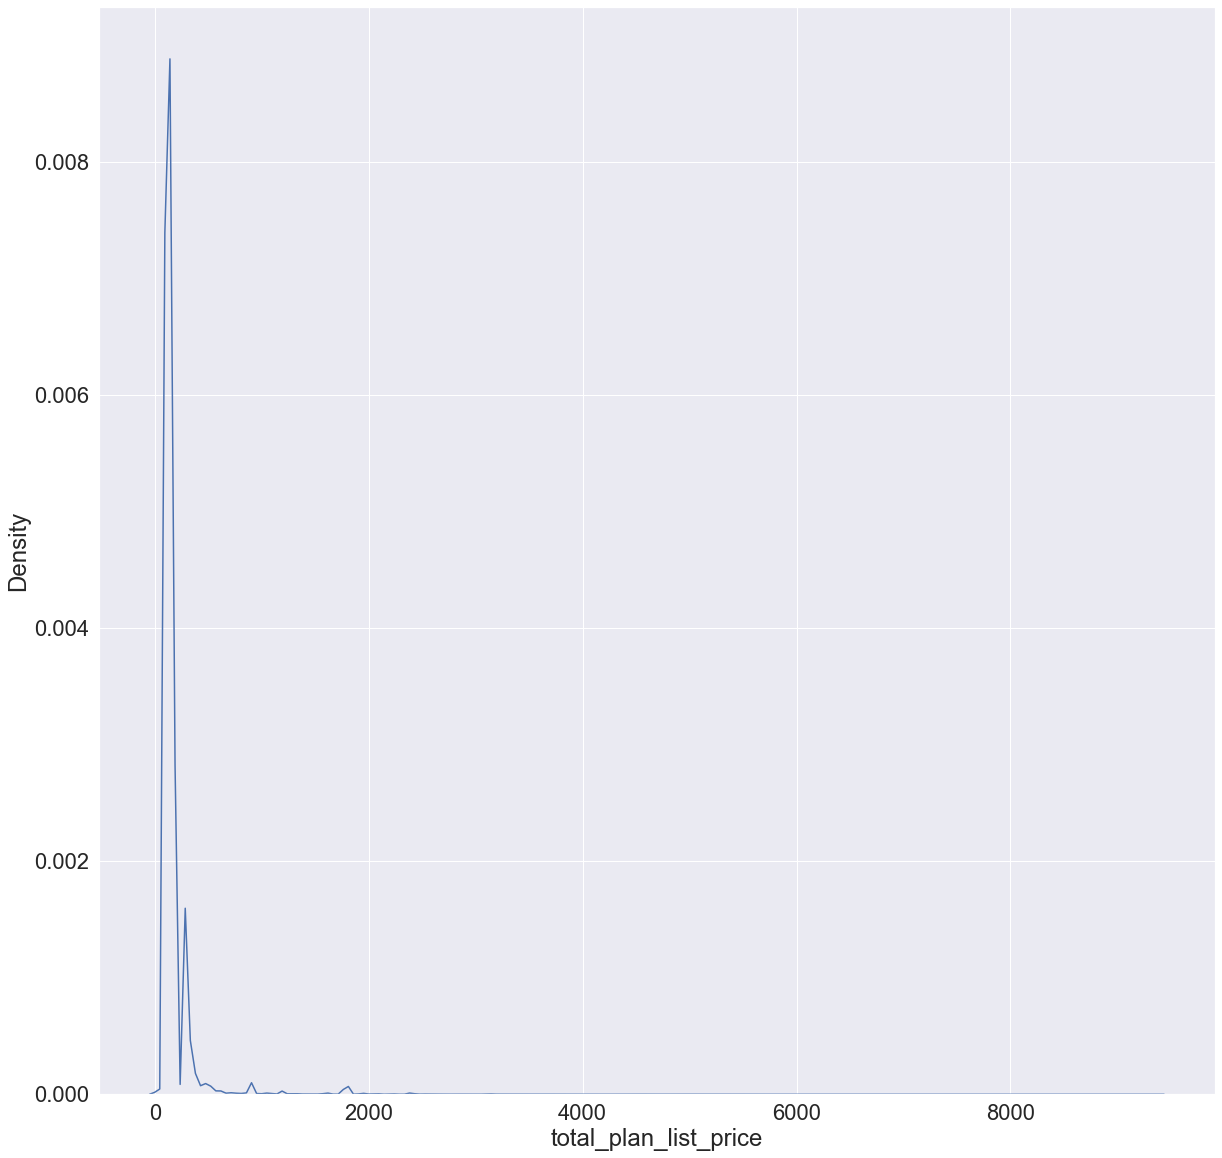

In [256]:
sns.kdeplot(data=X_train_y_train, x='total_plan_list_price')

By looking at the ratio_cancel and ratio_auto_renew variables we can see that:
* Most users _do not_ cancel
* Most users _do_ auto renew
* Most users do not change whether they auto_renew or cancel 

In [ ]:
sns.kdeplot(data=X_train_y_train, x='ratio_cancel')

In [ ]:
sns.kdeplot(data=X_train_y_train, x='ratio_auto_renew')

Remove unnecessary features

In [262]:
# We will remove registration_init_time since it is difficult to use it in training
aggregated_df.drop('registration_init_time', axis=1, inplace=True)

# Feature Scaling

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
ss = StandardScaler()

In [265]:
X_train.head()

,city,bd,gender,registered_via,registration_init_time,most_frequent_payment_method_id,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,ratio_cancel,ratio_auto_renew,avg_amount_paid_per_day,diff_plan_list_price_actual_amount_paid,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_secs
291941,13,25,male,4,20161001,40,30,149,149,0.0,1.0,4.966667,0,1.391304,0.391304,0.782609,0.521739,49.695652,39.695652,12850.113000
615317,1,28,unspecified,7,20150718,41,30,99,99,0.0,1.0,3.300000,0,4.333333,3.666667,0.666667,0.666667,11.000000,18.666667,3307.183000
345189,5,28,male,3,20150213,40,30,149,149,0.0,1.0,4.966667,0,1.916667,0.750000,0.750000,0.583333,12.916667,6.500000,3202.629833
513138,20,28,female,7,20140302,41,30,100,100,0.0,1.0,3.333333,0,1.413793,0.655172,0.241379,0.241379,100.413793,40.241379,22836.479140
83628,15,24,female,3,20150215,39,60,298,298,0.0,1.0,4.966667,0,1.960000,0.000000,0.000000,0.040000,7.920000,9.280000,1951.248480


In [266]:
X_train[numerical_features] = ss.fit_transform(X_train[numerical_features])

Perform the transformations on the test data

Convert the data type sof the features

In [267]:
X_test = X_test.astype({'city' : int, 'bd' : int, 'registered_via' : int, 'most_frequent_payment_method_id' : int, 'total_payment_plan_days' : int, 'total_plan_list_price' : int, 'total_actual_amount_paid' : int, 'diff_plan_list_price_actual_amount_paid' : int})

Remove bd outliers

In [268]:
X_test.bd[(X_test.bd <= 0) | (X_test.bd >= 100)] = np.nan
X_bd = imp_median.transform(X_test[['bd']])
X_test.bd = X_bd
X_test = X_test.astype({'bd' : int})

<ipython-input-268-ce1a68ace9ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.bd[(X_test.bd <= 0) | (X_test.bd >= 100)] = np.nan


Scale test features

In [269]:
X_test[numerical_features] = ss.transform(X_test[numerical_features])

Perform one hot encoding for the categorical features

In [270]:
from sklearn.preprocessing import OneHotEncoder

In [271]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [272]:
X_train_ohe_df = pd.DataFrame(enc.fit_transform(X_train[categorical_features]))
X_train_ohe_df.index = X_train.index
X_train = X_train.drop(categorical_features, axis=1)
X_train = pd.concat([X_train, X_train_ohe_df], axis=1)

In [273]:
X_test_ohe_df = pd.DataFrame(enc.fit_transform(X_test[categorical_features]))
X_test_ohe_df.index = X_test.index
X_test = X_test.drop(categorical_features, axis=1)
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

# Machine Learning!

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [276]:
len(X_test)

145145

Logistic Regression

In [104]:
parameters_lr = {'penalty' : ('l1', 'l2', 'elasticnet'), 'C' : np.logspace(-4, 4, 20)}

In [105]:
clf_lr = LogisticRegression(random_state=42)

In [106]:
clf_lr_tuned = RandomizedSearchCV(clf_lr, parameters_lr, cv=3, scoring='f1', verbose = 1)

In [107]:
clf_lr_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\model_sele

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ('l1', 'l2', 'elasticnet')},
                   scoring='f1', verbose=1)

In [108]:
clf_lr_tuned.best_params_

{'penalty': 'l2', 'C': 206.913808111479}

In [109]:
pred_lr = clf_lr_tuned.predict(X_train)
print(f1_score(y_train, pred_lr))
print(recall_score(y_train, pred_lr))
print(precision_score(y_train, pred_lr))
print(accuracy_score(y_train, pred_lr))

0.0
0.0
0.0
0.935536543817616


C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
pred_lr_test = clf_lr_tuned.predict(X_test)
print(f1_score(y_test, pred_lr_test))
print(recall_score(y_test, pred_lr_test))
print(precision_score(y_test, pred_lr_test))
print(accuracy_score(y_test, pred_lr_test))

0.0
0.0
0.0
0.9367735712563299


C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree hyperparameter tuning

In [110]:
parameters_dt = {'criterion' : ('gini', 'entropy'), 'max_depth' : (10, 14, 18, 22), 'max_features' : ('auto', 'sqrt', 'log2')}

In [111]:
clf_dt = DecisionTreeClassifier(random_state=42)

In [98]:
clf_dt_tuned = RandomizedSearchCV(clf_dt, parameters_dt, cv=3, scoring='f1', verbose = 1)

In [99]:
clf_dt_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 14, 18, 22),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2')},
                   scoring='f1', verbose=1)

In [100]:
clf_dt_tuned.best_params_

{'max_features': 'sqrt', 'max_depth': 18, 'criterion': 'entropy'}

In [102]:
pred_dt = clf_dt_tuned.predict(X_train)
print(f1_score(y_train, pred_dt))
print(recall_score(y_train, pred_dt))
print(precision_score(y_train, pred_dt))
print(accuracy_score(y_train, pred_dt))

0.792784730044594
0.6863944851172982
0.9382053248603046
0.9768695625214227


0.7418949484795175
0.6433474991827395
0.876094376020181
0.9716972682489924


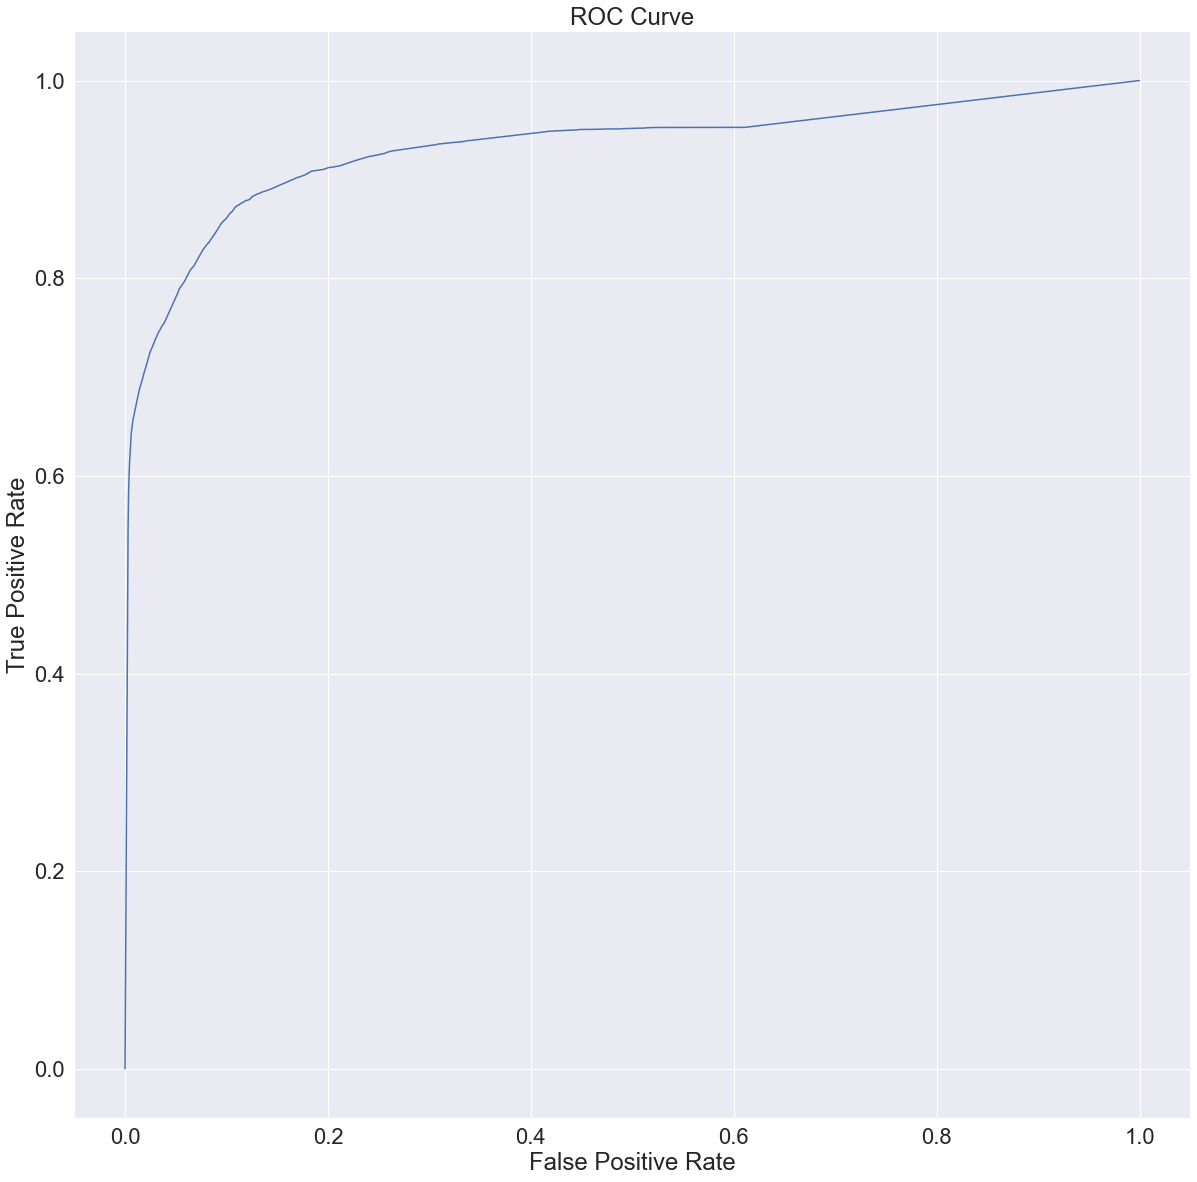

In [285]:
pred_dt_test = clf_dt_tuned.predict(X_test)
print(f1_score(y_test, pred_dt_test))
print(recall_score(y_test, pred_dt_test))
print(precision_score(y_test, pred_dt_test))
print(accuracy_score(y_test, pred_dt_test))




Random Forest hyperparameter tuning

In [135]:
parameters_rf = {'n_estimators' : (100,), 'max_depth' : (12, 16), 'max_features' : (4, 8, 12)}

In [136]:
clf_rf = RandomForestClassifier(random_state=42)

In [137]:
clf_rf_tuned = RandomizedSearchCV(clf_rf, parameters_rf, cv=3, scoring='f1', verbose = 1)

In [138]:
clf_rf_tuned.fit(X_train, y_train)

C:\Users\Saleh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (12, 16),
                                        'max_features': (4, 8, 12),
                                        'n_estimators': (100,)},
                   scoring='f1', verbose=1)

In [139]:
clf_rf_tuned.best_params_

{'n_estimators': 100, 'max_features': 12, 'max_depth': 16}

In [140]:
pred_rf = clf_rf_tuned.predict(X_train)
print(f1_score(y_train, pred_rf))
print(recall_score(y_train, pred_rf))
print(precision_score(y_train, pred_rf))
print(accuracy_score(y_train, pred_rf))

0.8154926973562582
0.7071554534280982
0.9630303471363074
0.9793722451974501


Predict on test data

In [286]:
pred_rf_test = clf_rf_tuned.predict(X_test)
print(f1_score(y_test, pred_rf_test))
print(recall_score(y_test, pred_rf_test))
print(precision_score(y_test, pred_rf_test))
print(accuracy_score(y_test, pred_rf_test))

0.7874866511715559
0.6830118775198867
0.9296944526846633
0.9766922732439974


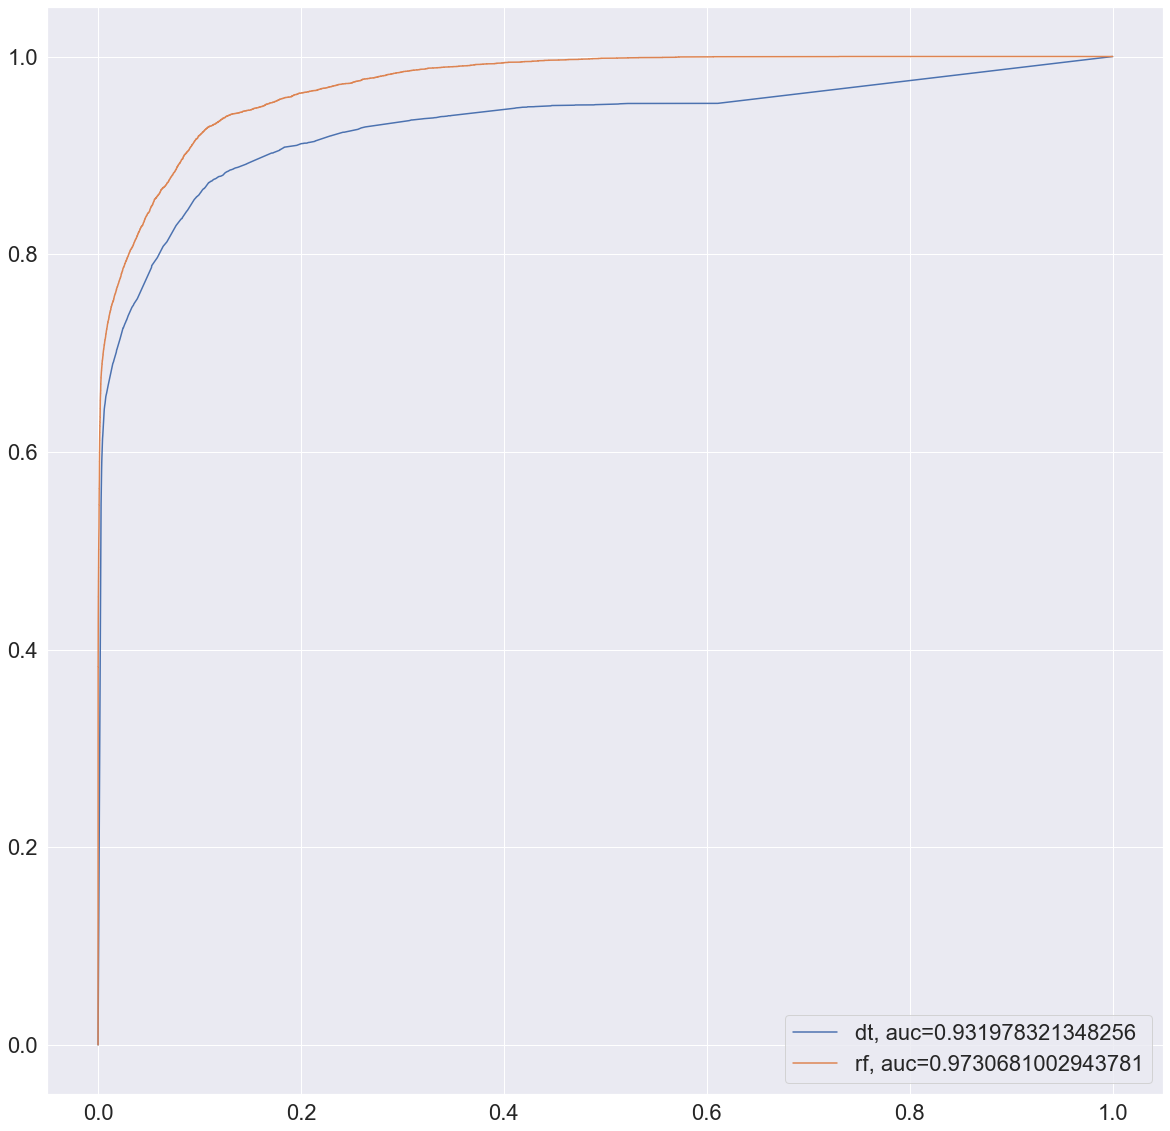

In [290]:
from sklearn import metrics

plt.figure(0).clf()

pred_dt_probas = clf_dt_tuned.predict_proba(X_test)[:,1]
pred_rf_probas = clf_rf_tuned.predict_proba(X_test)[:,1]

fpr, tpr, thresh = metrics.roc_curve(y_test, pred_dt_probas)
auc = metrics.roc_auc_score(y_test, pred_dt_probas)
plt.plot(fpr,tpr,label="dt, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, pred_rf_probas)
auc = metrics.roc_auc_score(y_test, pred_rf_probas)
plt.plot(fpr,tpr,label="rf, auc="+str(auc))

plt.legend(loc=0)
plt.savefig('../figures/auc_curves.png')

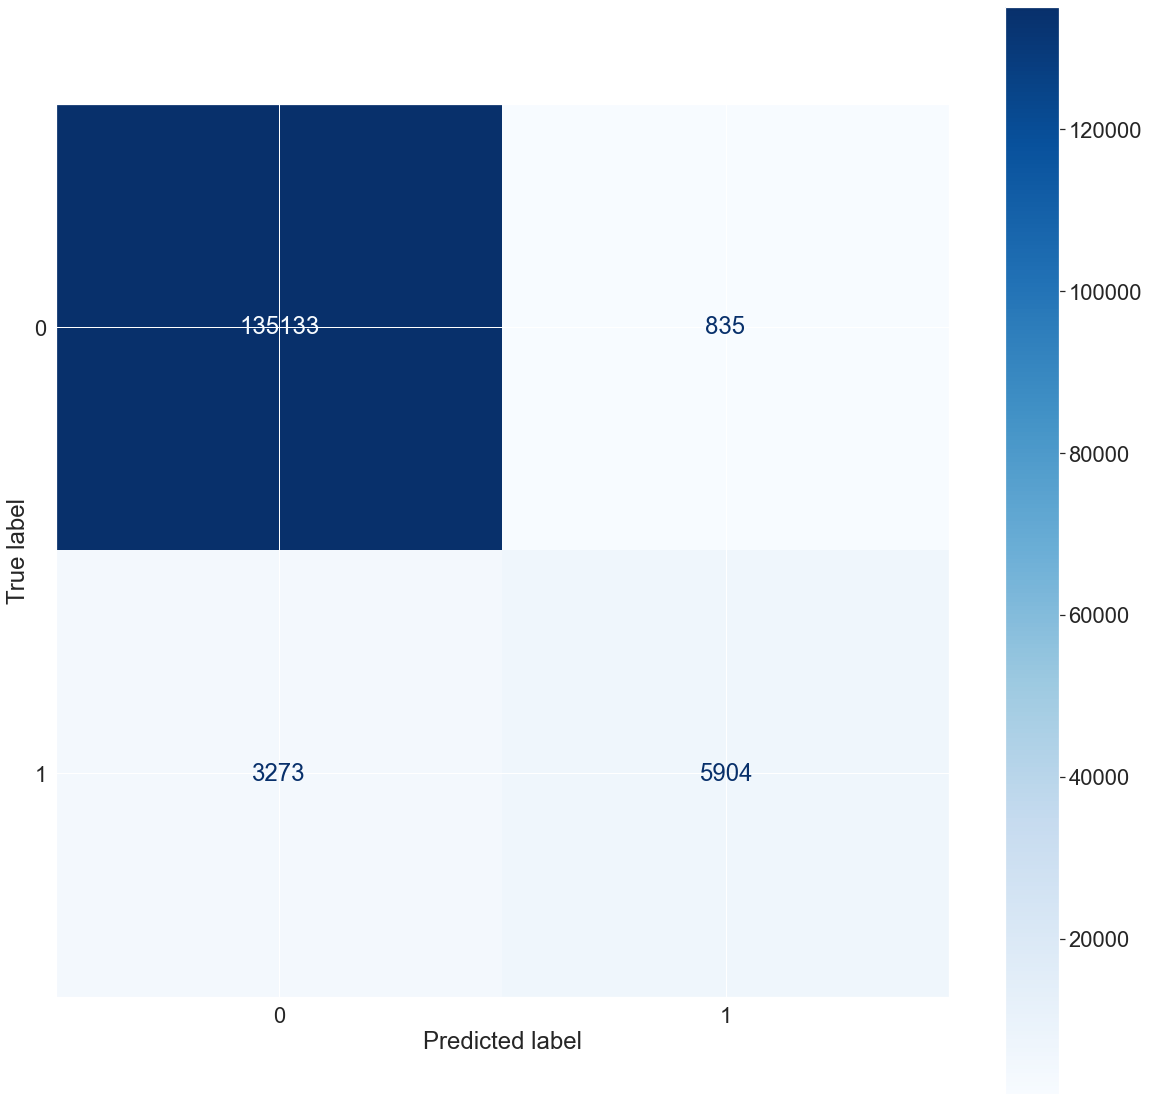

In [293]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt_tuned, X_test, y_test, cmap=plt.cm.Blues)
plt.savefig('../figures/confusion_matrix_dt.png')

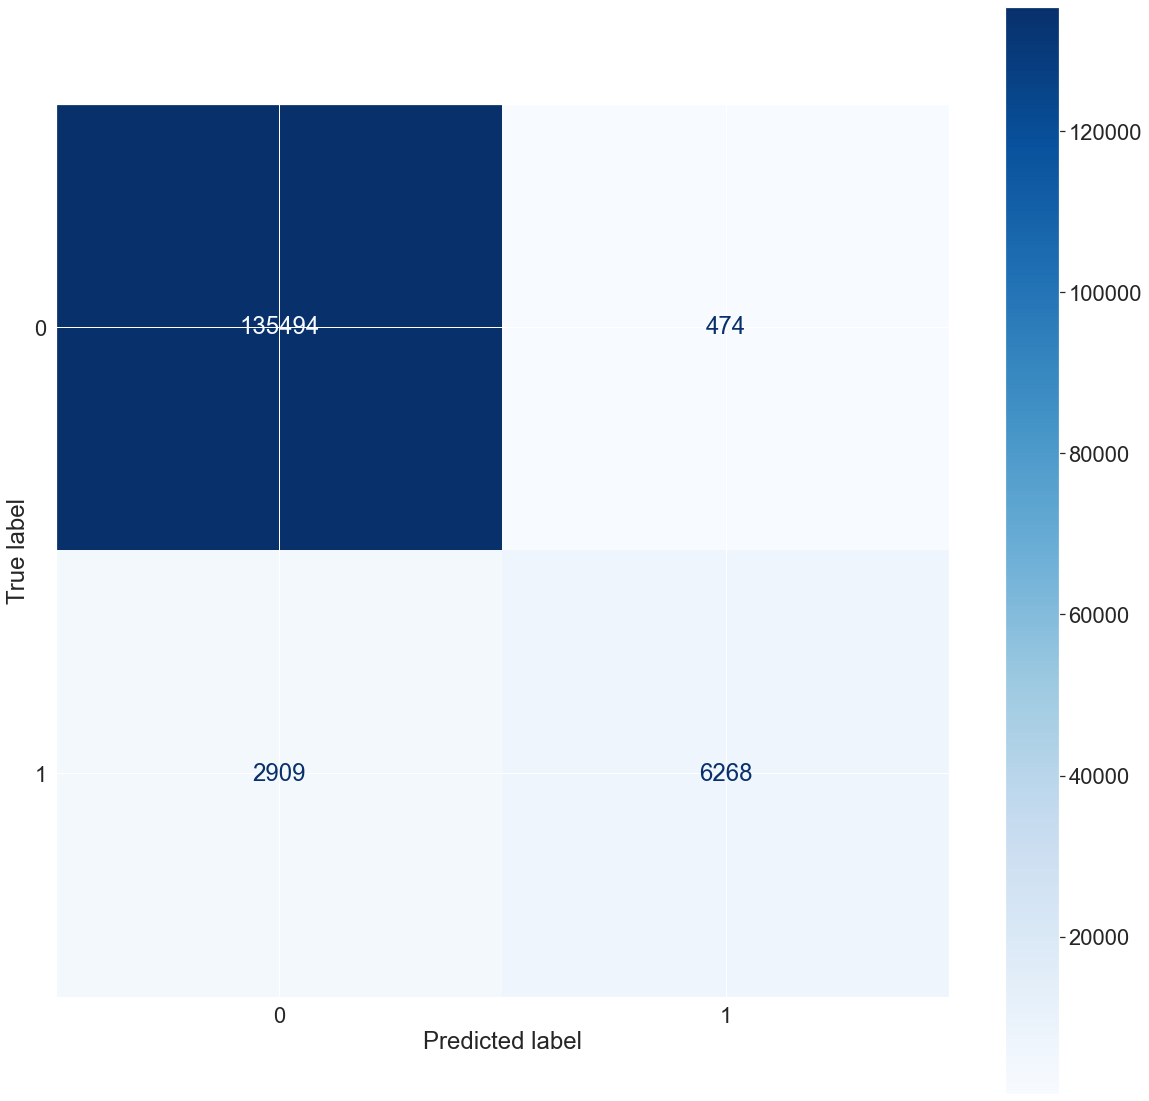

In [294]:
plot_confusion_matrix(clf_rf_tuned, X_test, y_test, cmap=plt.cm.Blues)
plt.savefig('../figures/confusion_matrix_rf.png')